# Milestone #1: Data Preparation
## Abstract
Music information is an important area in modern information systems, with applications ranging from recommendation engines to lyric-based search platforms. In this project, we present Tunix, a text-based search system inspired by Shazam, but designed to work without audio input. Instead, Tunix allows users to search for songs by typing lyrics, retrieving corresponding tracks, artists, and descriptive metadata.

The final system aims to provide efficient lyric-based search functionality, offering accurate results along with artist descriptions and related attributes, thereby improving music discovery through text queries.

## Introduction
Music retrieval systems such as Shazam have transformed how users interact with music, but they are primarily based on audio fingerprinting. In many cases, users may remember a fragment of lyrics rather than the melody. This project addresses this gap by creating Tunix, a system that retrieves songs, artists, and related information based on text queries derived from lyrics.

Tunix will integrate datasets containing tracks, artists, lyrics, and metadata into a unified and searchable database. The system is designed to return not only the matching track but also relevant contextual information such as artist biography and related metadata. This project contributes to the field of Information Retrieval by developing a structured pipeline for music data collection and preparation, enabling efficient and accurate text-based search functionalities.

## Data search:
- During our search for a suitable music dataset, we found many databases on this topic. However, most of them lacked song lyrics, while others included numerous attributes such as danceability and liveness, which were not relevant to our main objective. The biggest challenge we faced was related to artist information, as it was difficult to find datasets containing proper artist descriptions. To address this issue, we discovered that several APIs provide detailed information: given the name of a song, it is possible to retrieve the artist’s name, description, and additional attributes related to the song, the artist, and even the album.
### Data search Result:
#### search repositories for datasets

| Dataset URL | Attributes | Pros | Cons | Database Type |
|-------------|------------|------|------|---------------|
| [Audio features and lyrics of Spotify songs](https://www.kaggle.com/datasets/imuhammad/audio-features-and-lyrics-of-spotify-songs/data) | track_id, track_name, track_artist, lyrics, track_popularity, track_album_id, track_album_name, track_album_release_date, playlist_name, playlist_id, playlist_genre, playlist_subgenre, danceability, energy, key, loudness, mode, speechiness, instrumentalness, liveness, valence, tempo, duration_ms, language | A lot of information about the songs and many different tracks | Some songs don’t have lyrics and the number of songs per artist is a bit limited. Too many non-essential attributes | Songs |
| [Spotify Million Song Dataset](https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset) | song_name, artist_name, link, lyrics | Good balance of attributes, consistent number of songs per artist, and overall a well-sized dataset | Some inconsistencies in how values are obtained — description states data comes from the Spotify API, but song links are from a lyrics website | Songs |
| [Song Lyrics Dataset](https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset/data) | Artist, Title, Album, Date, Lyric, Year | Well-structured by artist; good complementary dataset to enrich the main dataset with lyrics information | Some songs do not have lyrics (marked consistently with the string "lyrics for this song have yet to be released please check back once the song has been released"); easy to detect and filter | Songs |
| [Lyrics and Metadata from 1950 to 2019](https://data.mendeley.com/datasets/3t9vbwxgr5/2) | artist_name, track_name, release_date, genre, lyrics, len, dating, violence, world/life, night/time, shake the audience, family/gospel, romantic, communication, obscene, music, movement/places, light/visual perceptions, family/spiritual, like/girls, sadness, feelings, danceability, loudness, acousticness, instrumentalness, valence, energy, topic, age | Very rich dataset with a large number of songs and detailed metadata | May have too many artists with only a few songs each and includes many non-essential attributes | Songs |
| [Artists](https://www.upf.edu/web/mtg/semantic-similarity) | artist_name,artist_mbid,biography,top_10_similar_mbids,dbpedia_uri | Very rich dataset with a large number of artists and detailed metadata | Its not a raw dataSet, its a set of files that need to be conected can be harder to work  | Artists |


#### Web scraping / crawling
- Maybe this is the best aprouch since there is not a lot of good datasbases with the artist bio

| Option Name | Method | Pros | Cons |
|-------------|--------|------|------|
| Wikipedia | Web scraping of artist pages | Usually rich and up-to-date textual content; covers a wide range of artists; freely accessible | Needs to handle disambiguation of artist names; scraping may be blocked if too many requests; text may require cleaning |
| DBpedia | SPARQL queries on DBpedia endpoint | Structured data extracted from Wikipedia; supports multiple languages; can get abstracts directly | Limited to artists with DBpedia entries; not all biographies are complete; requires knowledge of SPARQL |
| Wikidata | SPARQL queries on Wikidata endpoint | Very structured; easy to link with other datasets via QIDs; can extract multiple attributes | Not all artists have detailed biographies; abstracts are shorter than Wikipedia; requires SPARQL knowledge |
| Last.fm API | Queries the `artist.getInfo` endpoint to get `bio.content` | Easy to use; provides textual content ready for NLP | Low rate limiting (but manageable if calls are distributed) |
| Genius API | Queries the `/search` endpoint and retrieves the artist page `/artists/:id` | Focused on artist bios; very rich content | Low rate limiting; requires an API key |


## Select convenient data subsets

- Despite the availability of several good databases, we chose the Spotify Million Song Dataset. Although it contains fewer features, it is rich in music records and has fewer distinct artists, which reduces the number of required API calls. This way, we obtain fewer artists but more songs per artist. We also assumed that any additional attributes could later be retrieved through APIs to complement the dataset with artist information. 
- For this purpose, we selected the Genius API, as it focuses specifically on artists and music, providing detailed descriptions and additional metadata.

## Assess the authority of the data source and data quality
- Dataset: Spotify Million Song Dataset – Kaggle:
    - Authority: Public dataset on Kaggle, licensed CC0 (free to use). It’s a subset of the original Million Song Dataset.
    - Data Quality: Contains song names, artist names, lyrics, and links. Some entries may be missing or duplicate. 
- Genius API:
    - Authority: Genius is a well-known platform for song lyrics and artist info. The API is official, documented, and widely used.
    - Data Quality: Provides structured, regularly updated data. Some songs or artists may be missing, and user-contributed info can vary in quality.
## Exploratory Data Analysis:

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


data loaded
===== DATAFRAME SHAPE =====
Rows: 57650, Columns: 4

===== COLUMN NAMES AND DATA TYPES =====
artist    object
song      object
link      object
text      object
dtype: object 

===== MISSING VALUES =====
No missing values

===== DUPLICATE ROWS =====
Number of duplicate rows: 0

===== UNIQUE VALUES PER COLUMN =====
artist: 643 unique values
song: 44824 unique values
link: 57650 unique values
text: 57494 unique values

===== Average song per artis =====
89.65785381026438

===== BASIC STATISTICS FOR NUMERIC COLUMNS =====
No numeric columns.

===== MOST FREQUENT VALUES FOR CATEGORICAL COLUMNS =====
artist:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Name: count, dtype: int64

song:
song
Have Yourself A Merry Little Christmas    35
Angel                                     28
Home                                      27
Hold On                                   27
I Believe                        

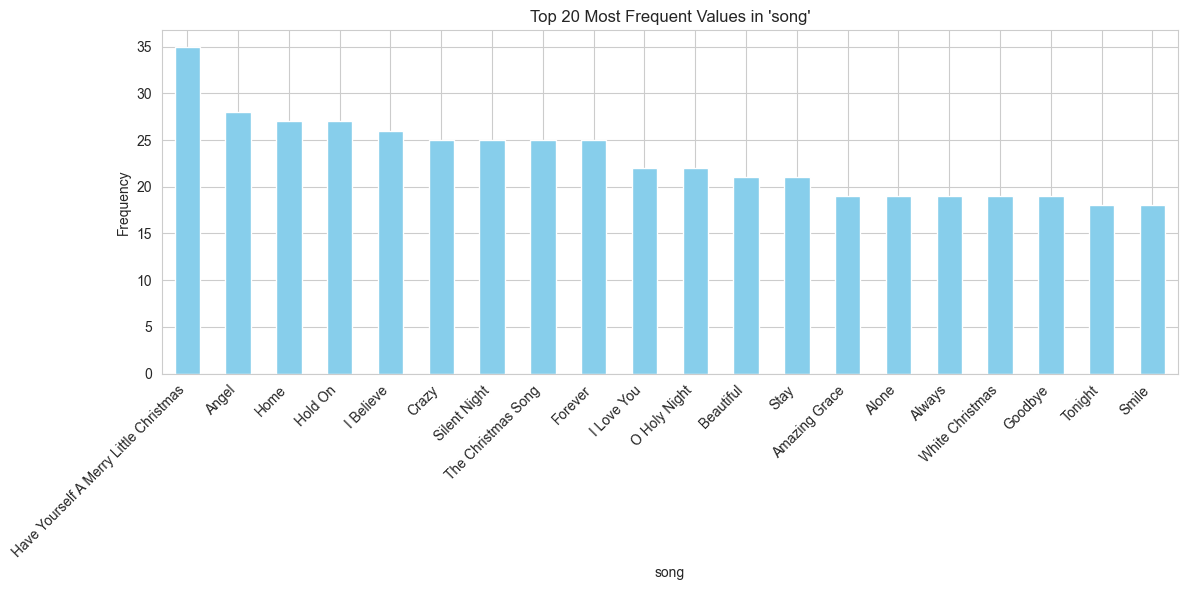

In [76]:
import data_utils
import importlib

importlib.reload(data_utils)
df=data_utils.load_data()
data_utils.dataAnalysis(df)
#data_utils.plot_artist_frequency(df, col="artist", top_n=20,most=True)
#data_utils.plot_artist_frequency(df, col="artist", top_n=20,most=False)
data_utils.plot_column_frequency(df,"song",20)


### Exploratory Data Analysis resume:
- **Atributes**:
    - artist-Artist Name
    - Song- The name of the song
    - Link-An identifier of the song
    - Text- The lyric of the song
- **Lyrics Structure**
    - Paragraphs separated by `\r\n` (each line or group of lines is a verse or pause)
    - Repeated lines indicate choruses or refrains
    - Variable length (short or long lyrics)
    - Keywords may indicate themes (e.g., "Christmas", "love", "baby")
    - Some lines contain musical notes or instructions (e.g., "[Chorus]")
    - Formatting may vary slightly between songs (extra spaces, capitalization)
    - Identical lyrics can appear for different artists (covers)

- **Link structure**
  - Each link points to a **unique song page** on lyricsfreak
  - The URL usually contains:
    - **Artist name** (`/a/abba/` → ABBA)
    - **Song title** (`ahes+my+kind+of+girl`)
  - The number at the end (e.g., `_20598417`) is a **unique  song ID**

- **Unique values**:
    - Looking to the unique values we can conclude that there in mean like 89 songs per artis which is your goal since we dont want to call the artist APi that much
    - The low unique values of the songs is because there are a lot of songs with the same name and  difrent version of the same song with difrent singers
    - The diference between the number of links and the number of text is because we have songs with same lyrics they are the same songs but they have difrent artist singing it 
    


## Prepare and Document a Data Processing Pipeline

### Main Idea

The goal is to **enrich our dataset** with additional metadata obtained via the **Last.fm API**.  
Specifically, we aim to collect the following fields:
- **Primary Artist Description**
- **Album Title**
- **Release Date**
- **Track Description**

---

### How to Achieve This

**API Root:**  
`http://ws.audioscrobbler.com/2.0/`  

All requests use the following base parameters:  
- `method` — specifies the API method to call  
- `api_key` — your Last.fm API key  
- `format=json` — to receive results in JSON format  

---

### Main Steps

#### 1. Normalize Input Row
Prepares clean `(song, artist)` pairs for each dataset row.  
- The helper function picks the first non-empty value for both song and artist.  
- Ensures consistent capitalization and trimming.

---

#### 2. Track Search — `search_track(track, artist)`
Finds the best track match and retrieves its identifiers.  
- **Method:** `track.search`  
- **Returns:** `(track_mbid, artist_mbid, track_name, artist_name)`  
- **Endpoint example:**  
  ```
  http://ws.audioscrobbler.com/2.0/?method=track.search
  &track={TRACK}
  &artist={ARTIST}
  &api_key=YOUR_KEY
  &format=json
  ```
  ---

#### 3. Artist Metadata — `get_artist_info(artist_name, artist_mbid)`
Retrieves descriptive information about the artist.  
- **Method:** `artist.getInfo` (prefer MBID; fallback to name)  
- **Extracted fields:**
- `bio.content` or `bio.summary` → cleaned HTML text (via `_clean_html`)
- `name` → normalized artist name  
- **Special handling:**  
- Detect and retry in case of “incorrect tag” boilerplate responses.  
- **Endpoint example:**  

  ```
  http://ws.audioscrobbler.com/2.0/?method=artist.getInfo
  &artist={ARTIST}
  &api_key=YOUR_KEY
  &format=json
  ```
  ---

#### 4. Track Metadata — `get_track_info(track_name, artist_name, track_mbid)`
Fetches detailed information about the track and its album.  
- **Method:** `track.getInfo` (prefer MBID when available)  
- **Extracted fields:**
- `track.wiki.content` or `track.wiki.summary` → cleaned track description  
- `track.wiki.published` → track-level release date (if available)  
- `track.album` → `album.title` and `album.mbid` (if present)  
- **Endpoint example:** 

  ```
  http://ws.audioscrobbler.com/2.0/?method=track.getInfo
  &track={TRACK}
  &artist={ARTIST}
  &api_key=YOUR_KEY
  &format=json
  ```


### Data storage result :

- The  dataset produced by the pipeline is organized into two main tables — Musics and Artists, each containing enriched metadata collected from the Last.fm API.


#### 1. Musics

- **Lyrics**
- **lastfm_album_name**
- **link**
- **lastfm_track_description**
- **lastfm_release_date**

#### 2. Artists

- **artist**
- **lastfm_artist_name**
- **lastfm_artist_bio**
 

 



## Process Data Analysis

To validate the data processing, we perform the following checks:

### General Checks
- **Null values**: Identify missing data in the dataset.
- **Duplicate rows**: Detect repeated records that may need removal.
- **Unique values per column**: Understand the variety of entries in each column.

### Solve null:
- album_name- Change the null value to Single

### Individual Checks
- **Short string validations**:  
  In long text fields like `artist_bio` and `lyrics`, we check for unusually short strings that may not make sense.

- **Wrong artist bios**:  
  - the null artist bios need to be removed
  - When fetching data from the Last.fm API, some entries may be invalid or return multiple results.  
  To detect these cases, we focus on entries containing the strings:  
    - `"There are"`  
    - `"Read more on Last.fm"`  
    
  These help us identify artist bios that need further validation or cleanup.

### Rename Columns
To simplify the dataset, we rename some attributes:

- `lastfm_artist_bio` → `artist_bio`  
- `lastfm_album_name` → `album_name`  


### Remove Columns
Some columns are removed to reduce redundancy or low-information fields:

**Songs:**
- `link` → not interesting  
- `lastfm_track_description` → low information  
- `lastfm_release_date` → low information  

**Artist:**
- `lastfm_artist_name` → same as `artist_name` 


### Add Columns
We add columns to improve dataset connectivity and identification:

**Songs:**
- `artist_id` → to connect with the Artist dataset  
- `id` → unique identifier for songs  


In [ ]:
# added id to artist.csv
import  data_utils

import pandas as pd
import importlib
importlib.reload(data_utils)

# remove some columns from songs csv
importlib.reload(data_utils)
a=data_utils.connectArtistSong('../dataset/spotify_artists_lastfm.csv','../dataset/spotify_millsongdata_test_lastfm_with_lastfm.csv')
data_utils.remove_lastfm_artist_name('../dataset/spotify_artists_lastfm.csv')
data_utils.removeLinkToSong(a)
a.to_csv('../dataset/songs.csv', index=False)
df_lastfm=pd.read_csv('../dataset/spotify_artists_lastfm.csv')
df_songs=pd.read_csv('../dataset/songs.csv')

data_utils.dataProcessAnalysis(df_lastfm)
data_utils.dataProcessAnalysis(df_songs)




'link' column removed from DataFrame.
===== DATAFRAME SHAPE =====
Rows: 643, Columns: 3

===== COLUMN NAMES AND DATA TYPES =====
id                    int64
artist               object
lastfm_artist_bio    object
dtype: object 

===== MISSING VALUES =====
lastfm_artist_bio    5
dtype: int64
===== DUPLICATE ROWS =====
Number of duplicate rows: 0

===== UNIQUE VALUES PER COLUMN =====
id: 643 unique values
artist: 643 unique values
lastfm_artist_bio: 633 unique values

===== DATAFRAME SHAPE =====
Rows: 57650, Columns: 6

===== COLUMN NAMES AND DATA TYPES =====
song                        object
text                        object
lastfm_track_description    object
lastfm_release_date         object
lastfm_album_name           object
artist_id                    int64
dtype: object 

===== MISSING VALUES =====
lastfm_track_description    49289
lastfm_release_date         49289
lastfm_album_name              39
dtype: int64
===== DUPLICATE ROWS =====
Number of duplicate rows: 0

===== UNIQUE

===== DATAFRAME SHAPE =====
Rows: 643, Columns: 3

===== COLUMN NAMES AND DATA TYPES =====
id                    int64
artist               object
lastfm_artist_bio    object
dtype: object 

===== MISSING VALUES =====
lastfm_artist_bio    5
dtype: int64
===== DUPLICATE ROWS =====
Number of duplicate rows: 0

===== UNIQUE VALUES PER COLUMN =====
id: 643 unique values
artist: 643 unique values
lastfm_artist_bio: 633 unique values

===== DATAFRAME SHAPE =====
Rows: 57650, Columns: 6

===== COLUMN NAMES AND DATA TYPES =====
song                        object
text                        object
lastfm_track_description    object
lastfm_release_date         object
lastfm_album_name           object
artist_id                    int64
dtype: object 

===== MISSING VALUES =====
lastfm_track_description    49289
lastfm_release_date         49289
lastfm_album_name              39
dtype: int64
===== DUPLICATE ROWS =====
Number of duplicate rows: 0

===== UNIQUE VALUES PER COLUMN =====
song: 44824 u

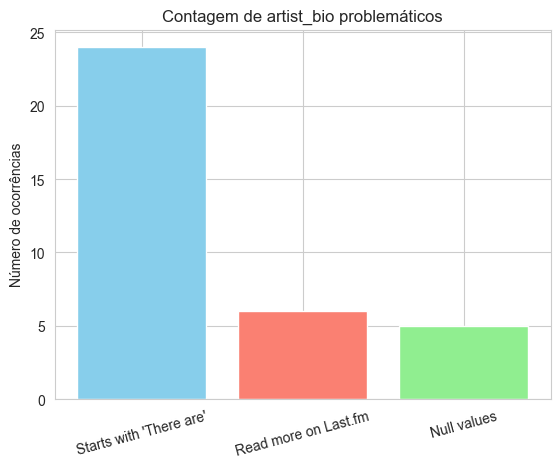

number of music that have wrong artist bio:
2465
Music names
["As Long As There's Christmas", 'Something There', 'Tale As Old As Time', 'Theres Something There', 'Angels From The Realm Of Glory', 'Back Door Santa', 'Caroling, Caroling', 'Christmas Dinner', 'Come On, Ring Those Bells', "Don't Save It All For Christmas Day", 'First Christmas', 'From Heaven High, O Angels, Come', 'Fum, Fum, Fum', 'Good Christian Men, Rejoice', 'Happy Xmas (War Is Over)', 'Home For The Holidays', 'Home On Christmas Day', 'I Want A Hippopotamus For Christmas', 'If Every Day Was Like Christmas', "If It Doesn't Snow On Christmas", 'Il Est Ne, Le Divin Enfant', 'In Excelsis Gloria', 'It Came Upon A Midnight Clear', "It's The Most Wonderful Time Of The Year", 'Jingle, Jingle, Jingle', 'Little Christmas Tree', 'Little Saint Nick', 'Mary, Did You Know?', 'Merry Christmas, Baby', 'Merry Christmas Everybody', 'Mistletoe And Holly', "Nuttin' For Christmas", "O Remember Adam's Fall", "Please Daddy (Don't Get Drunk Th

d:\Rodrigo\DeskTop\Faculdade\mestrado\PRI\PRI\src\data_utils.py:332: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  song['album_name'].fillna('Single', inplace=True)


In [ ]:

import pandas as pd
import  data_utils
import importlib
importlib.reload(data_utils)

df_lastfm=pd.read_csv('../dataset/spotify_artists_lastfm.csv')
df_songs=a

data_utils.dataProcessAnalysis(df_lastfm)
data_utils.dataProcessAnalysis(df_songs)

data_utils.plot_short_string_values(df_lastfm, column='lastfm_artist_bio', min_len=4)
data_utils.plot_short_string_values(df_songs, column='text', min_len=4)
c=data_utils.printWrongArtistBios(df_lastfm)
d=data_utils.getWrongMusic(df_songs,c)



In [73]:
import  data_utils
import importlib
importlib.reload(data_utils)

df_artist=pd.read_csv('../dataset/spotify_artists_lastfm.csv')
newArt,newsong=data_utils.process_dataFinal(df_artist, df_songs)

newArt.to_csv('../finalDataset/artist.csv', index=False)
newsong.to_csv('../finalDataset/song.csv', index=False)



d:\Rodrigo\DeskTop\Faculdade\mestrado\PRI\PRI\src\data_utils.py:332: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  song['album_name'].fillna('Single', inplace=True)


In [75]:
import pandas as pd
import  data_utils
import importlib
importlib.reload(data_utils)

df_lastfm=pd.read_csv('../finalDataset/artist.csv')
df_songs=pd.read_csv('../finalDataset/song.csv')

data_utils.dataProcessAnalysis(df_lastfm)
data_utils.dataProcessAnalysis(df_songs)

data_utils.plot_short_string_values(df_lastfm, column='artist_bio', min_len=4)
data_utils.plot_short_string_values(df_songs, column='text', min_len=4)
c=data_utils.getWrongArtistBios(df_lastfm,col='artist_bio')
d=data_utils.getWrongMusic(df_songs,c)


===== DATAFRAME SHAPE =====
Rows: 614, Columns: 3

===== COLUMN NAMES AND DATA TYPES =====
id             int64
artist        object
artist_bio    object
dtype: object 

===== MISSING VALUES =====
artist_bio    6
dtype: int64
===== DUPLICATE ROWS =====
Number of duplicate rows: 0

===== UNIQUE VALUES PER COLUMN =====
id: 614 unique values
artist: 614 unique values
artist_bio: 608 unique values

===== DATAFRAME SHAPE =====
Rows: 55471, Columns: 5

===== COLUMN NAMES AND DATA TYPES =====
id             int64
song          object
text          object
album_name    object
artist_id      int64
dtype: object 

===== MISSING VALUES =====
No missing values

===== DUPLICATE ROWS =====
Number of duplicate rows: 0

===== UNIQUE VALUES PER COLUMN =====
id: 55471 unique values
song: 43266 unique values
text: 55328 unique values
album_name: 13022 unique values
artist_id: 614 unique values

Nenhum valor com len < 4 na coluna 'artist_bio'.
Nenhum valor com len < 4 na coluna 'text'.
number of music tha



## Final Dataset Description

After the data cleaning and preprocessing steps, two final datasets were obtained: **Artist** and **Song**.  
These datasets are now consistent, well-structured, and ready for analysis or integration into the application.
It have 55185 entries

---

### Song Dataset

Each row in the **Song** dataset represents a unique song, including relevant metadata and a reference to its artist.
It have 608 entries

**Main Columns:**
- **id** → Unique identifier for each song.  
- **artist_id** → Foreign key linking each song to its respective artist in the Artist dataset.  
- **title** → The title of the song.  
- **album_name** → The name of the album where the song appears. Missing values were replaced with `"Single"` to indicate standalone releases.  
- **lyrics** → Textual content of the song lyrics.  


---

###  Artist Dataset

Each row in the **Artist** dataset represents a unique musical artist with cleaned and validated information.

**Main Columns:**
- **id** → Unique identifier for each artist.  
- **artist_name** → The official name of the artist.  
- **artist_bio** → A textual biography of the artist, cleaned to remove irrelevant or ambiguous entries.  


---

###  Dataset Relationship

The **Artist** and **Song** datasets are connected through the `artist_id` column:
